In [85]:
import requests
import json
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import numpy as np
import plotly.express as px

In [86]:
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps00098?format=JSON&time=2011&time=2012&time=2013&time=2014&time=2015&time=2016&time=2017&time=2018&time=2019&time=2020&time=2021&time=2022&geo=BE&geo=BG&geo=CZ&geo=DK&geo=DE&geo=EE&geo=IE&geo=EL&geo=ES&geo=FR&geo=HR&geo=IT&geo=CY&geo=LV&geo=LT&geo=LU&geo=HU&geo=MT&geo=NL&geo=AT&geo=PL&geo=PT&geo=RO&geo=SI&geo=SK&geo=FI&geo=SE&geo=IS&geo=NO&geo=CH&geo=BA&geo=RS&geo=TR&unit=PC_GDP&spdeps=TOTAL&lang=en"
response = requests.get(url)
data = response.json()
dimensions = data['dimension']
values = data['value']

rows = []
dim_names = list(dimensions.keys())

for index, value in values.items():
    row = {}
    idx = int(index)
    temp_idx = idx
    
    for dim_name in reversed(dim_names):
        dim_size = len(dimensions[dim_name]['category']['index'])
        dim_idx = temp_idx % dim_size
        temp_idx = temp_idx // dim_size
        
        dim_keys = list(dimensions[dim_name]['category']['index'].keys())
        category_key = dim_keys[dim_idx]
        
        if 'label' in dimensions[dim_name]['category']:
            row[dim_name] = dimensions[dim_name]['category']['label'].get(category_key, category_key)
        else:
            row[dim_name] = category_key
    
    row['value'] = value  
    rows.append(row)      
df = pd.DataFrame(rows)
df_clean = df.drop(["spdeps", "freq", "unit"], axis=1)
df_clean = df_clean[df_clean['geo'] != 'Türkiye']
df_clean = df_clean[df_clean['geo'] != 'Bosnia and Herzegovina']
df_clean = df_clean.drop_duplicates(subset=["geo", "time"])

In [87]:
display(df_clean)
print(df_clean.time.tolist())

,time,geo,value
0,2011,Austria,28.96
1,2012,Austria,29.29
2,2013,Austria,29.83
3,2014,Austria,30.00
4,2015,Austria,29.97
...,...,...,...
377,2018,Slovakia,17.82
378,2019,Slovakia,17.81
379,2020,Slovakia,19.40
380,2021,Slovakia,19.03


['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2011', '2012', '2013', '2014', '2015',

In [88]:
df_clean = df_clean.drop_duplicates(subset=["geo", "time"])
df_clean.head(50)

,time,geo,value
0,2011,Austria,28.96
1,2012,Austria,29.29
2,2013,Austria,29.83
3,2014,Austria,30.00
4,2015,Austria,29.97
5,2016,Austria,29.91
6,2017,Austria,29.48
7,2018,Austria,29.21
8,2019,Austria,29.37
9,2020,Austria,34.08


In [89]:
df_clean = df_clean.sort_values(by=["time", "geo"])
len(set(df_clean['geo']))

31

In [90]:
df_clean["time"] = df_clean["time"].astype(int)
df_clean = df_clean.sort_values(by=["geo", "time"])


In [91]:
def X_df(country):
    df_X = pd.DataFrame()
    df_X["Countries"] = [country] * 7
    df_X["lag_1"] = df_clean[(df_clean["geo"] == country) & (df_clean["time"] >= 2015) & (df_clean["time"] <= 2021)]["value"].reset_index(drop = True)
    df_X["lag_2"] = df_clean[(df_clean["geo"] == country) & (df_clean["time"] >= 2014) & (df_clean["time"] <= 2020)]["value"].reset_index(drop = True)
    df_X["lag_3"] = df_clean[(df_clean["geo"] == country) & (df_clean["time"] >= 2013) & (df_clean["time"] <= 2019)]["value"].reset_index(drop = True)
    df_X["lag_4"] = df_clean[(df_clean["geo"] == country) & (df_clean["time"] >= 2012) & (df_clean["time"] <= 2018)]["value"].reset_index(drop = True)
    df_X["lag_5"] = df_clean[(df_clean["geo"] == country) & (df_clean["time"] >= 2011) & (df_clean["time"] <= 2017)]["value"].reset_index(drop = True)
    df_X["COVID"] =  [0, 0, 0, 0, 1, 1, 0]
    df_X["y"] = df_clean[(df_clean["geo"] == country) & (df_clean["time"] >= 2016) & (df_clean["time"] <= 2022)]["value"].reset_index(drop = True)
    return df_X



In [92]:
ml2_df = X_df("Austria")
display(ml2_df)

,Countries,lag_1,lag_2,lag_3,lag_4,lag_5,COVID,y
0,Austria,29.97,30.00,29.83,29.29,28.96,0,29.91
1,Austria,29.91,29.97,30.00,29.83,29.29,0,29.48
2,Austria,29.48,29.91,29.97,30.00,29.83,0,29.21
3,Austria,29.21,29.48,29.91,29.97,30.00,0,29.37
4,Austria,29.37,29.21,29.48,29.91,29.97,1,34.08
5,Austria,34.08,29.37,29.21,29.48,29.91,1,32.83
6,Austria,32.83,34.08,29.37,29.21,29.48,0,30.45


In [93]:
country_list = df_clean["geo"].unique().tolist() 
print(country_list)
all_dfs = []
for i in (country_list):
    df_country = X_df(i)
    all_dfs.append(df_country)
final_df = pd.concat(all_dfs, ignore_index=True)
display(final_df)
    




['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland']


,Countries,lag_1,lag_2,lag_3,lag_4,lag_5,COVID,y
0,Austria,29.97,30.00,29.83,29.29,28.96,0,29.91
1,Austria,29.91,29.97,30.00,29.83,29.29,0,29.48
2,Austria,29.48,29.91,29.97,30.00,29.83,0,29.21
3,Austria,29.21,29.48,29.91,29.97,30.00,0,29.37
4,Austria,29.37,29.21,29.48,29.91,29.97,1,34.08
...,...,...,...,...,...,...,...,...
212,Switzerland,27.59,27.23,26.85,26.07,25.87,0,27.07
213,Switzerland,27.07,27.59,27.23,26.85,26.07,0,27.65
214,Switzerland,27.65,27.07,27.59,27.23,26.85,1,31.43
215,Switzerland,31.43,27.65,27.07,27.59,27.23,1,29.65


In [94]:
nan_rows = final_df.isna().any(axis=1)
final_df[nan_rows]

,Countries,lag_1,lag_2,lag_3,lag_4,lag_5,COVID,y


In [95]:
X_removed = final_df.drop(['y'], axis=1)
#display(X_removed)
y = final_df['y'].to_numpy()
display(y)


array([29.91, 29.48, 29.21, 29.37, 34.08, 32.83, 30.45, 29.35, 28.95,
       28.76, 28.63, 32.46, 30.12, 28.55, 17.33, 16.82, 16.86, 16.61,
       18.61, 18.81, 18.64, 21.43, 21.12, 21.14, 21.15, 23.94, 22.42,
       20.9 , 19.31, 18.31, 17.53, 18.31, 24.25, 21.65, 19.81, 18.56,
       18.09, 18.24, 18.49, 21.51, 21.18, 19.94, 32.56, 32.1 , 31.92,
       31.81, 33.44, 31.01, 28.06, 16.23, 15.64, 16.04, 16.11, 18.94,
       17.23, 15.74, 31.91, 30.75, 30.28, 30.24, 32.1 , 31.29, 30.08,
       34.32, 34.09, 33.82, 33.48, 38.  , 35.73, 33.98, 29.04, 28.93,
       29.1 , 29.55, 32.39, 31.4 , 30.01, 26.6 , 25.61, 25.33, 25.19,
       29.05, 26.63, 24.14, 18.73, 18.16, 17.52, 16.52, 18.16, 17.64,
       16.67, 22.13, 23.39, 23.97, 25.05, 30.49, 29.35, 25.91, 15.65,
       14.54, 13.8 , 13.37, 15.  , 13.15, 11.37, 29.01, 28.73, 28.74,
       29.09, 34.17, 31.42, 29.75, 15.46, 15.28, 15.75, 16.15, 17.99,
       19.97, 18.86, 15.41, 15.08, 15.69, 16.36, 19.31, 18.41, 16.59,
       20.33, 20.98,

In [96]:
df.to_csv('X_removed.csv', 
          index=False,    
          na_rep='NaN',         
          encoding='utf-8')

In [97]:
categorical_cols = ["Countries"]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X_removed[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))
display(one_hot_df)
print(one_hot_df.columns.tolist())

,Countries_Austria,Countries_Belgium,Countries_Bulgaria,Countries_Croatia,Countries_Cyprus,Countries_Czechia,Countries_Denmark,Countries_Estonia,Countries_Finland,Countries_France,...,Countries_Norway,Countries_Poland,Countries_Portugal,Countries_Romania,Countries_Serbia,Countries_Slovakia,Countries_Slovenia,Countries_Spain,Countries_Sweden,Countries_Switzerland
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


['Countries_Austria', 'Countries_Belgium', 'Countries_Bulgaria', 'Countries_Croatia', 'Countries_Cyprus', 'Countries_Czechia', 'Countries_Denmark', 'Countries_Estonia', 'Countries_Finland', 'Countries_France', 'Countries_Germany', 'Countries_Greece', 'Countries_Hungary', 'Countries_Iceland', 'Countries_Ireland', 'Countries_Italy', 'Countries_Latvia', 'Countries_Lithuania', 'Countries_Luxembourg', 'Countries_Malta', 'Countries_Netherlands', 'Countries_Norway', 'Countries_Poland', 'Countries_Portugal', 'Countries_Romania', 'Countries_Serbia', 'Countries_Slovakia', 'Countries_Slovenia', 'Countries_Spain', 'Countries_Sweden', 'Countries_Switzerland']


In [98]:
lag_features = final_df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', "COVID"]]
X_combined = pd.concat([one_hot_df,lag_features], axis=1)
display(X_combined)

,Countries_Austria,Countries_Belgium,Countries_Bulgaria,Countries_Croatia,Countries_Cyprus,Countries_Czechia,Countries_Denmark,Countries_Estonia,Countries_Finland,Countries_France,...,Countries_Slovenia,Countries_Spain,Countries_Sweden,Countries_Switzerland,lag_1,lag_2,lag_3,lag_4,lag_5,COVID
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.97,30.00,29.83,29.29,28.96,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.91,29.97,30.00,29.83,29.29,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.48,29.91,29.97,30.00,29.83,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.21,29.48,29.91,29.97,30.00,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.37,29.21,29.48,29.91,29.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,27.59,27.23,26.85,26.07,25.87,0
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,27.07,27.59,27.23,26.85,26.07,0
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,27.65,27.07,27.59,27.23,26.85,1
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,31.43,27.65,27.07,27.59,27.23,1


In [99]:
X = X_combined.to_numpy()
display(X)

array([[ 1.  ,  0.  ,  0.  , ..., 29.29, 28.96,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 29.83, 29.29,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 30.  , 29.83,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 27.23, 26.85,  1.  ],
       [ 0.  ,  0.  ,  0.  , ..., 27.59, 27.23,  1.  ],
       [ 0.  ,  0.  ,  0.  , ..., 27.07, 27.59,  0.  ]], shape=(217, 37))

In [100]:
print("NaN count in X:", np.isnan(X).sum())
print("Infinite values in X:", np.isinf(X).sum())

NaN count in X: 0
Infinite values in X: 0


In [103]:
XtXinv = np.linalg.inv(np.matmul(X.T, X))
m = np.matmul(XtXinv, np.matmul(X.T, y))
m

array([20.15609812, 19.16537251, 11.20129961, 13.9333251 , 12.82257559,
       12.55240975, 20.10235428, 10.57299161, 19.8978389 , 22.72616274,
       19.67385691, 16.8658366 , 11.03346486, 17.15677233,  8.35727674,
       19.67980327, 11.16743457, 10.80285585, 14.05155252,  9.83077182,
       18.79588664, 16.99207523, 13.76834045, 16.23660282, 10.14303005,
       12.1066579 , 11.66432923, 15.48626926, 16.66939852, 18.22661627,
       18.59441451,  0.07180313,  0.05221321,  0.23627735,  0.26593165,
       -0.29748739,  2.5641307 ])

In [108]:
res = y - np.matmul(X, m)
print(res)
MSE_1 = (res**2).mean()
print(MSE_1)

[-1.86490689e-01 -6.96215506e-01 -8.09684237e-01 -5.35118266e-01
  1.72199064e+00  2.85740041e-01  2.19778021e-01  3.93286860e-01
 -1.00337014e-01 -1.29432380e-01 -1.17785263e-01  1.42564598e+00
 -1.19789986e+00 -2.73478324e-01  2.62626858e-01 -6.65468756e-01
 -2.90782832e-01  2.28648445e-03 -5.60523057e-01 -4.60097928e-01
  1.71195923e+00  4.12830442e-01  2.13647935e-01  3.49157821e-02
  2.10542354e-01  4.94283195e-01 -1.13695690e+00 -2.29262803e-01
 -9.86581912e-01 -1.58343988e+00 -8.41603060e-01 -6.05342072e-01
  3.09190151e+00  2.99375047e-01  6.25690371e-01 -5.39925217e-01
 -6.16669108e-01 -2.58413466e-01  8.21468954e-02  4.72466045e-01
 -4.54844145e-02  9.05879266e-01  1.10041759e+00  6.50812037e-01
  9.09052378e-01  1.28292275e+00  6.37623093e-01 -2.11067331e+00
 -2.47015453e+00  9.59437116e-01  1.36974179e-01  2.16264470e-01
 -1.11667763e-01  5.06406381e-01 -1.22906771e+00 -4.78346676e-01
  1.27674541e+00  2.65561335e-02 -2.55763708e-01 -4.38104894e-03
 -3.58022621e-01 -8.94831

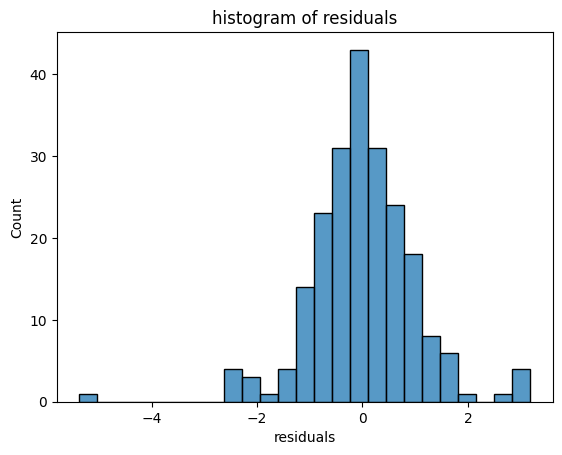

In [109]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.histplot(res, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()